In [17]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_pd = pd.read_csv(mouse_drug_data_to_load)
clinical_pd = pd.read_csv(clinical_trial_data_to_load)

#Combine the data into a single dataset
merge_pf=merge_df = pd.merge(mouse_pd, clinical_pd, on="Mouse ID")

# Display the data table for preview

merge_pf.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [18]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
new_df=merge_df.drop(["Metastatic Sites","Mouse ID"], axis=1)
tumor_volume_data =new_df.groupby(["Drug","Timepoint"])

tumor_volume_df=(tumor_volume_data.mean()).reset_index()

# Preview DataFrame

tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [19]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

tumor_volume_sem=(tumor_volume_data.sem()).reset_index()

# Preview DataFrame
tumor_volume_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [20]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
re_format_tumor=tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

re_format_tumor.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


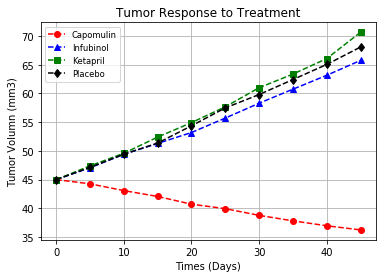

In [21]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(re_format_tumor.index, re_format_tumor['Capomulin'],
             marker ='o',color='r', linestyle='--', label="Capomulin")
ax.errorbar(re_format_tumor.index, re_format_tumor['Infubinol'],
              marker ='^',color='b',linestyle='--', label="Infubinol")
ax.errorbar(re_format_tumor.index, re_format_tumor['Ketapril'], 
             marker ='s',color='g', linestyle='--', label="Ketapril")

ax.errorbar(re_format_tumor.index, re_format_tumor['Placebo'], 
             marker ='d',color='black',linestyle='--', label="Placebo")


ax.set_xlabel("Times (Days)")
ax.set_ylabel("Tumor Volumn (mm3)")
ax.set_title("Tumor Response to Treatment")
plt.legend(loc ="upper left",fontsize="small", fancybox=True)
plt.grid()


# Save the Figure

plt.savefig("Images/Tumor_Resposne.png")

In [22]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [23]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

new_df=merge_df.drop(["Tumor Volume (mm3)","Mouse ID"], axis=1)
Metastatic_data =new_df.groupby(["Drug","Timepoint"])

Metastatic_df=(Metastatic_data.mean())

# Preview DataFrame
Metastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [24]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

Metastatic_sem=Metastatic_data.sem()

# Preview DataFrame
Metastatic_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [25]:
# Minor Data Munging to Re-Format the Data Frames

Metastatic_new=Metastatic_df.reset_index()
re_format_Metastatic=Metastatic_new.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

re_format_Metastatic.head()


# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


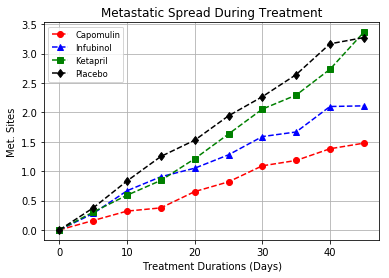

In [26]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(re_format_Metastatic.index, re_format_Metastatic['Capomulin'],
             marker ='o',color='r', linestyle='--', label="Capomulin")
ax.errorbar(re_format_Metastatic.index, re_format_Metastatic['Infubinol'],
              marker ='^',color='b',linestyle='--', label="Infubinol")
ax.errorbar(re_format_Metastatic.index, re_format_Metastatic['Ketapril'], 
             marker ='s',color='g', linestyle='--', label="Ketapril")

ax.errorbar(re_format_Metastatic.index, re_format_Metastatic['Placebo'], 
             marker ='d',color='black',linestyle='--', label="Placebo")


ax.set_xlabel("Treatment Durations (Days)")
ax.set_ylabel("Met. Sites")
ax.set_title("Metastatic Spread During Treatment")
plt.legend(loc ="upper left",fontsize="small", fancybox=True)
plt.grid()


# Save the Figure

plt.savefig("Images/Metastatic_Spread.png")

# Show the Figure
plt.show()


## Survival Rates

In [27]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

new_df=merge_df.drop(["Tumor Volume (mm3)","Metastatic Sites"], axis=1)
mouse_data =new_df.groupby(["Drug","Timepoint"])

mouse_df=(mouse_data["Mouse ID"].count()).reset_index()

mouse_count=mouse_df.rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame
mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [28]:
# Minor Data Munging to Re-Format the Data Frames

re_format_mouse=mouse_count.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview the Data Frame
re_format_mouse.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


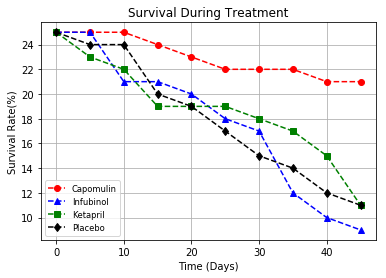

In [29]:
# Generate the Plot (Accounting for percentages)

fig, ax = plt.subplots()

ax.errorbar(re_format_mouse.index, re_format_mouse['Capomulin'],
             marker ='o',color='r', linestyle='--', label="Capomulin")
ax.errorbar(re_format_mouse.index, re_format_mouse['Infubinol'],
              marker ='^',color='b',linestyle='--', label="Infubinol")
ax.errorbar(re_format_mouse.index, re_format_mouse['Ketapril'], 
             marker ='s',color='g', linestyle='--', label="Ketapril")

ax.errorbar(re_format_mouse.index, re_format_mouse['Placebo'], 
             marker ='d',color='black',linestyle='--', label="Placebo")


ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate(%)")
ax.set_title("Survival During Treatment")
plt.legend(loc ="lower left",fontsize="small", fancybox=True)
plt.grid()


# Save the Figure

plt.savefig("Images/Survival_Mouse.png")


# Show the Figure
plt.show()

## Summary Bar Graph

In [37]:
# Calculate the percent changes for each drug
tumor_pct_change =  100 * (re_format_tumor.iloc[-1] - re_format_tumor.iloc[0]) / re_format_tumor.iloc[0]
# Display the data to confirm
tumor_pct_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

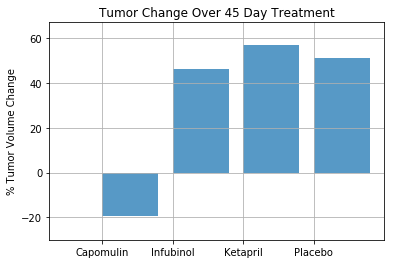

In [117]:
# Store all Relevant Percent Changes into a Tuple

Drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
Percent =[-19.475303,46.123472,57.028795,51.297960]

# Splice the data between passing and failing drugs

x_axis = np.arange(0, len(Drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

# Orient widths. Add labels, tick marks, etc. 

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

# Use functions to label the percentages of changes

plt.xlim(-0.75, len(Drugs))
plt.ylim(-30, max(Percent) + 10)

# Call functions to implement the function calls

plt.bar(x_axis, Percent, alpha=0.75, align="edge")

for i in Percent:
    if i > 0:
        facecolor="r"
    
else: facecolor="g"


plt.xticks(tick_locations, Drugs)

plt.grid()

# Save the Figure
plt.savefig("Images/Bar_Chart.png")

# Show the Figure
plt.show()